**Lab 4 : Influence Model**
- Instuctor : Kijung Shin
- Teaching Assistants : Deukryeol Yoon(main), Hyunju Lee, Shinhwan Kang
- 본 실습에서는 정보 정파 모델 중 독립적 전파모델과 선형 임계치 모형 시뮬레이터에 대해서 알아본다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 실습에 필요한 library를 import하고 그래프 및 변수를를 초기화합니다.
import networkx as nx
import matplotlib.pyplot as plt
import random

import os
import os.path as osp

G = nx.DiGraph()                                                                                              
data = osp.abspath(osp.join(os.getcwd(), 'drive/MyDrive/data/lab/lab4/simple_weighted_directed_graph.txt'))    
f = open(data)
for line in f:
    line_split = line.split()
    src = int(line_split[0])
    dst = int(line_split[1])
    w = float(line_split[2])
    G.add_edge(src, dst, weight=w)

In [6]:
# 독립적 전파 모델이 전파되는 과정을 그리는 함수입니다.

def draw(G: nx.Graph, affected: set(), used: set()) -> None:
    pos = {
            0:[0.5, 0.8], 1: [0.1, 0.5], 2:[0.2, 0.2],
            3:[0.8, 0.7], 4: [0.7, 0.4], 5:[0.45, 0.45],
            6:[0.6, 0.1], 7:[0.9, 0.35], 8:[0.7, 0.1]
    }
    
    nodeColorList = []
    nodeList = []
    for i in range(len(G.nodes)):
        nodeList.append(i)
        if i in affected:
            nodeColorList = nodeColorList + ['red']
        else :
            nodeColorList = nodeColorList + ['blue']
    im = nx.draw_networkx_nodes(G, pos, nodelist = nodeList, node_color=nodeColorList, node_size=100)
    edgeList = []
    edgeColorList = []
    for edge in G.edges:
        edgeList.append(edge)
        if edge in used:
            edgeColorList = edgeColorList + ['red']
        else :
            edgeColorList = edgeColorList + ['blue']
    nx.draw_networkx_edges(G, pos, edgelist = edgeList, edge_color = edgeColorList)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    plt.show()


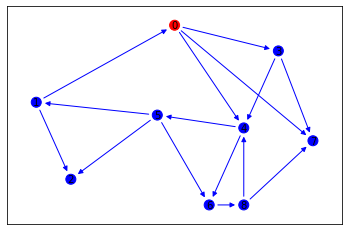

In [7]:
# 시드 집합, 즉 최초 전염자를 지정합니다
affected = set()  # 감염자
affected_new = set({0}) # 새로운 감염자 저장
used_edge = set() # 감염이 시도된 간선들의 집합
draw(G, affected | affected_new, used_edge) # 0번 정점, 붉게 표시됨

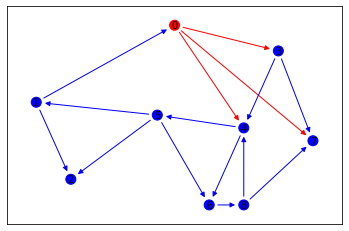

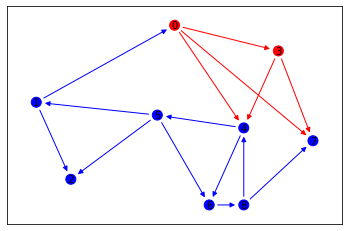

In [8]:
# 독립적 전파 모형을 시뮬레이션 합니다.
while len(affected_new) != 0: # 종료 조건 더이상 영향 받을 수 있는 새로운 감염자 없음
  temp = set() # 이번 iteration에서 새롭게 감염된 감염자
  for src in affected_new:
    neighbors = G.neighbors(src)
    for dst in neighbors:
      if (dst not in affected) and (dst not in affected_new): # 감염시킬 수 있으면
        p = random.uniform(0, 1) # 랜덤으로
        if p < G.edges[src, dst]["weight"]: # 감염될 확률이면
          temp.add(dst)# 감염시킴
        used_edge.add((src, dst)) # 감염시도한 edge를 시각화 하기 위한 부분 
  affected = affected | affected_new
  affected_new = temp
  draw(G, affected, used_edge)  

In [10]:
#선형 임계치 모형 시뮬레이터 

# 실습에 사용할 방향성이 없고 가중치도 없는 그래프를 읽어 불러옵니다.
G = nx.Graph()                                                                                              
data = osp.abspath(osp.join(os.getcwd(), 'drive/MyDrive/data/lab/lab4/simple_undirected_graph.txt'))     
f = open(data)
for line in f:
    line_split = line.split()
    src = int(line_split[0])
    dst = int(line_split[1])
    G.add_edge(src, dst)

In [11]:
# 선형 임계치 모형이 전파되는 과정을 그리는 함수입니다.
# networkx graph와 감염된 node list(affected)를 받아서 그림을 그립니다.
# 생략하고 넘어가셔도 좋습니다.

def draw(G: nx.Graph, affected: set()) -> None:
    pos = {
            0:[0.5, 0.8], 1: [1, 0.85], 2:[1.2, 0.9],
            3:[0.3, 0.6], 4: [0.7, 0.6], 5:[1.3, 0.6],
            6:[1.5, 0.7], 7:[0.6, 0.2], 8:[1.2, 0.3],
            9:[1, 0.1], 10:[0.4, 0.1]
    }
    
    nodeColorList = []
    nodeList = []
    for i in range(len(G.nodes)):
        nodeList.append(i)
        if i in affected:
            nodeColorList = nodeColorList + ['red']
        else :
            nodeColorList = nodeColorList + ['blue']
    im = nx.draw_networkx_nodes(G, pos, nodelist = nodeList, node_color=nodeColorList, node_size=100)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    plt.show()

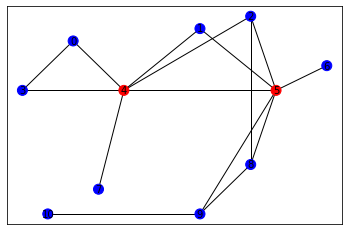

In [12]:
# 시드 집합, 즉 얼리 어답터를 지정합니다.
team_A = set({4, 5}) # A를 선택
team_B = set([v for v in G.nodes if v not in team_A]) # B를 선택
draw(G, team_A) # 빨간색으로 표시

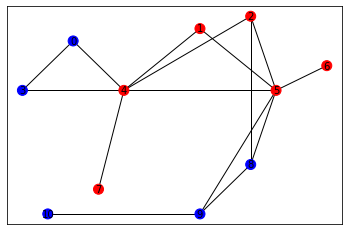

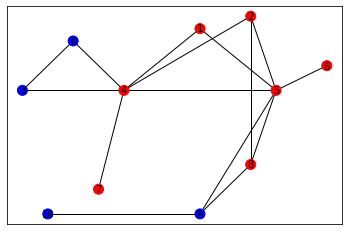

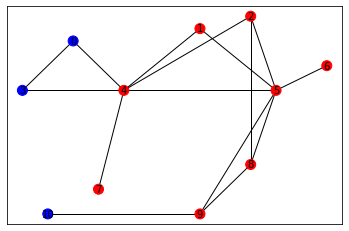

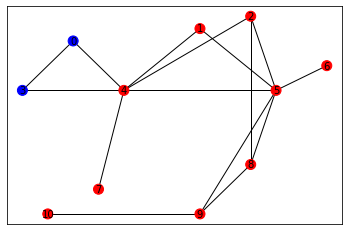

In [13]:
# 선형 임계치 모형을 시뮬레이션 합니다.
threshold = 0.5
while True:
  new_A = set()
  for v in team_B:
    neighbors = list(G.neighbors(v))
    neighbors_A = [v2 for v2 in neighbors if v2 in team_A]
    if len(neighbors_A) / len(neighbors) > threshold:
      new_A.add(v)
  if len(new_A)==0:
    break
  team_A = team_A | new_A
  team_B = team_B - new_A
  draw(G, team_A)  